In [55]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
import glob
import cv2
from sklearn import metrics
import seaborn as sns
%matplotlib inline

In [56]:
# created parent class for training of data

class train:
    def animal(self, cat, dog):
        #function name animal is used and path of the folder is passed in the parameters
        cats_dogs = []
        file=glob.glob(cat)
        file2=glob.glob(dog)

        for i in file:
            img= cv2.imread(i,0)
            img = cv2.resize(img, dsize=(250, 250))
            cats_dogs.append(img)

        for i in file2:
            img=cv2.imread(i,0)
            img = cv2.resize(img, dsize=(250, 250))
            cats_dogs.append(img)

        self.cats_dogs = np.asarray(cats_dogs)
        # In list name cats_dogs all images of cats and dogs are stored.
        
    def shape(self):
        X = self.cats_dogs
        zeros = np.zeros(402) 
        ones = np.ones(402) 
        Y = np.concatenate((zeros,ones),axis=0)
        print("Shape of X =", X.shape)
        print("Shape of Y =", Y.shape)
        # Above print statement suggest shape of both input variable X and output variable Y
        
        self.X_train, self.X_test, self.Y_train, self.Y_test = train_test_split(X, Y, test_size=0.15, random_state=0)
        self.num_train = self.X_train.shape[0]
        self.num_test = self.X_test.shape[0]
        print("Data supplied in training phase = ",self.num_train)
        print("Data supplied in testing phase = ",self.num_test)
        #Above the data supplied is split into training and testing  with 85% data in training and rest in testing.
        
    def merge_transpose(self):
        self.X_train_dimen = self.X_train.reshape(self.num_train, self.X_train.shape[1]*self.X_train.shape[2])
        self.X_test_dimen = self.X_test.reshape(self.num_test, self.X_test.shape[1]*self.X_test.shape[2])
        print("X Train flat Shape: " ,self.X_train_dimen.shape)
        print("X Test flat Shape: " ,self.X_test_dimen.shape)
        # Here the dimension reductionality is used to combine 250*250 
        
        self.x_train =self.X_train_dimen.T
        self.x_test = self.X_test_dimen.T
        self.y_train =self.Y_train.T
        self.y_test = self.Y_test.T
        print("x train shape = ",self.x_train.shape)
        print("x test shape = ",self.x_test.shape)
        print("y train shape = ",self.y_train.shape)
        print("y test shape = ",self.y_test.shape)
        # .T function is used to transpose the shape of the variable
        
#New class knn is defined which inherit train class.
class knn(train):
    def classification_knn(self):
        #Below for loop is used to check accuracy of the model with different k values
        for k in range(1):
            k_value =k+1
            model = KNeighborsClassifier(n_neighbors = k_value)
            model.fit(self.x_train.T,self.y_train.T)
            self.y_pred = model.predict(self.x_test.T)
            print(k_value ,"=", metrics.accuracy_score(self.y_test.T,self.y_pred))
        
        # With k value = 5 best accuracy is obtained so we have used it and trained the model with k_value = 5
        model = KNeighborsClassifier(n_neighbors = 5)
        model.fit(self.x_train.T,self.y_train.T)
        
        self.pred = model.predict(self.x_test.T)
        #prediction of x_test value is done and accuracy for the same is occured.
        
        print(metrics.accuracy_score(self.y_test.T,self.pred)*100,"% accuracy") 
        
        cnf = metrics.confusion_matrix(self.y_test,self.pred)
        class_names=[0,1]
        fig, ax = plt.subplots()
        tick_marks = np.arange(len(class_names))
        plt.xticks(tick_marks, class_names)
        plt.yticks(tick_marks, class_names)
        sns.heatmap(pd.DataFrame(cnf), annot=True, cmap="YlGnBu" ,fmt='g')
        ax.xaxis.set_label_position("top")
        plt.tight_layout()
        plt.title('Confusion matrix', y=1.1)
        plt.ylabel('Actual label')
        plt.xlabel('Predicted label')
        # Confusion matrix with heatmap is made for better vizualiation and to see miss classification
        
        
        
        

#New class SVM is defined which inherit train class.        
class SVM(train):
    def classification_SVM(self):
        #SVM fn called with for acurracy of model
        
        model = svm.SVC(kernel='linear')
        model.fit(self.x_train.T,self.y_train.T)
        self.pred = model.predict(self.x_test.T)
        print(metrics.accuracy_score(self.y_test.T,self.pred)*100,"% accuracy") 
        
        cnf = metrics.confusion_matrix(self.y_test,self.pred)
        class_names=[0,1]
        fig, ax = plt.subplots()
        tick_marks = np.arange(len(class_names))
        plt.xticks(tick_marks, class_names)
        plt.yticks(tick_marks, class_names)
        sns.heatmap(pd.DataFrame(cnf), annot=True, cmap="YlGnBu" ,fmt='g')
        ax.xaxis.set_label_position("top")
        plt.tight_layout()
        plt.title('Confusion matrix', y=1.1)
        plt.ylabel('Actual label')
        plt.xlabel('Predicted label')
        # Confusion matrix with heatmap is made for better vizualiation and to see miss classification

        
#New class NB(Naive Bayes) is defined which inherit train class.           
class NB(train):
    def classification_NB(self):
        #NB fn called for accuracy of model

        model = GaussianNB()
        model.fit(self.x_train.T,self.y_train.T)
        self.pred = model.predict(self.x_test.T)
        print(metrics.accuracy_score(self.y_test.T,self.pred)*100,"% accuracy") 
        
        cnf = metrics.confusion_matrix(self.y_test,self.pred)
        class_names=[0,1]
        fig, ax = plt.subplots()
        tick_marks = np.arange(len(class_names))
        plt.xticks(tick_marks, class_names)
        plt.yticks(tick_marks, class_names)
        sns.heatmap(pd.DataFrame(cnf), annot=True, cmap="YlGnBu" ,fmt='g')
        ax.xaxis.set_label_position("top")
        plt.tight_layout()
        plt.title('Confusion matrix', y=1.1)
        plt.ylabel('Actual label')
        plt.xlabel('Predicted label')
        # Confusion matrix with heatmap is made for better vizualiation and to see miss classification
        
        

#New class LR(Logistic Regression) is defined which inherit train class.           
class LR(train):
    def classification_LR(self):
        #Logistic fn called with 15 times irreration

        model = LogisticRegression(random_state = 0,max_iter= 15)
        model.fit(self.x_train.T,self.y_train.T)
        self.pred = model.predict(self.x_test.T)
        print(metrics.accuracy_score(self.y_test.T,self.pred)*100,"% accuracy") 
        
        cnf = metrics.confusion_matrix(self.y_test,self.pred)
        class_names=[0,1]
        fig, ax = plt.subplots()
        tick_marks = np.arange(len(class_names))
        plt.xticks(tick_marks, class_names)
        plt.yticks(tick_marks, class_names)
        sns.heatmap(pd.DataFrame(cnf), annot=True, cmap="YlGnBu" ,fmt='g')
        ax.xaxis.set_label_position("top")
        plt.tight_layout()
        plt.title('Confusion matrix', y=1.1)
        plt.ylabel('Actual label')
        plt.xlabel('Predicted label')
        # Confusion matrix with heatmap is made for better vizualiation and to see miss classification
        
        
        
        
        
#Child class validate is class which inherit the properties of all parent class.
class validate(knn, SVM, NB, LR):
    def validate_animal(self, link):
        #In the above function the path of folder is given to access the images stored for testing.
        cats_dogs_valid = []
        file=glob.glob(link)

        for i in file:
            img= cv2.imread(i,0)
            img = cv2.resize(img, dsize=(250, 250))
            cats_dogs_valid.append(img)

        self.X_valid = np.asarray(cats_dogs_valid)
        
    def knn_predic(self):
        #Here the function pred is used to predict the images supplied belogs to dog or cat. 
        self.num_X_valid = self.X_valid.shape[0]
        #print("Total elemenmts in testing are = ",self.num_X_valid)
        
        self.X_valid_dimen = self.X_valid.reshape(self.num_X_valid ,self.X_valid.shape[1]*self.X_valid.shape[2])
        #print(self.X_valid_dimen.shape)
        
        self.x_valid = self.X_valid_dimen.T
        #print(self.x_valid.shape)
        
        model = KNeighborsClassifier(n_neighbors = 5)
        model.fit(self.x_train.T,self.y_train.T)
        self.pred_valid = model.predict(self.x_valid.T)
        print("Predicted values = ",self.pred_valid)
        
        prediction = pd.DataFrame(self.pred_valid,index = None, columns=['predictions']).to_csv('D:/cerebroz_assignment/output/prediction_knn.csv')
        
    def SVM_predic(self):
        #Here the function pred is used to predict the images supplied belogs to dog or cat. 
        self.num_X_valid = self.X_valid.shape[0]
        #print("Total elemenmts in testing are = ",self.num_X_valid)
        
        self.X_valid_dimen = self.X_valid.reshape(self.num_X_valid ,self.X_valid.shape[1]*self.X_valid.shape[2])
        #print(self.X_valid_dimen.shape)
        
        self.x_valid = self.X_valid_dimen.T
        #print(self.x_valid.shape)
        
        model = svm.SVC(kernel='linear')
        model.fit(self.x_train.T,self.y_train.T)
        self.pred_valid = model.predict(self.x_valid.T)
        print("Predicted values = ",self.pred_valid)
        
        prediction = pd.DataFrame(self.pred_valid,index = None, columns=['predictions']).to_csv('D:/cerebroz_assignment/output/prediction_SVM.csv')
        
        
    def NB_predic(self):
        #Here the function pred is used to predict the images supplied belogs to dog or cat. 
        self.num_X_valid = self.X_valid.shape[0]
        #print("Total elemenmts in testing are = ",self.num_X_valid)
        
        self.X_valid_dimen = self.X_valid.reshape(self.num_X_valid ,self.X_valid.shape[1]*self.X_valid.shape[2])
        #print(self.X_valid_dimen.shape)
        
        self.x_valid = self.X_valid_dimen.T
        #print(self.x_valid.shape)
        
        model = GaussianNB()
        model.fit(self.x_train.T,self.y_train.T)
        self.pred_valid = model.predict(self.x_valid.T)
        print("Predicted values = ",self.pred_valid)
        
        prediction = pd.DataFrame(self.pred_valid,index = None, columns=['predictions']).to_csv('D:/cerebroz_assignment/output/prediction_NB.csv')
        
        
    def LR_predic(self):
        #Here the function pred is used to predict the images supplied belogs to dog or cat. 
        self.num_X_valid = self.X_valid.shape[0]
        #print("Total elemenmts in testing are = ",self.num_X_valid)
        
        self.X_valid_dimen = self.X_valid.reshape(self.num_X_valid ,self.X_valid.shape[1]*self.X_valid.shape[2])
        #print(self.X_valid_dimen.shape)
        
        self.x_valid = self.X_valid_dimen.T
        #print(self.x_valid.shape)
        
        model = LogisticRegression(random_state = 0,max_iter= 15)
        model.fit(self.x_train.T,self.y_train.T)
        self.pred_valid = model.predict(self.x_valid.T)
        print("Predicted values = ",self.pred_valid)
        
        prediction = pd.DataFrame(self.pred_valid,index = None, columns=['predictions']).to_csv('D:/cerebroz_assignment/output/prediction_LR.csv')

In [57]:
# object is created of child class which can be used to call function of parent class also.
obj = validate()

In [58]:
#in function animal path for folder dog and cat is set
obj.animal("D:/cerebroz_assignment/train/cats/*","D:/cerebroz_assignment/train/dogs/*")

In [59]:
# It depicts the shape for X and Y variable and data splited for train and test
obj.shape()

Shape of X = (804, 250, 250)
Shape of Y = (804,)
Data supplied in training phase =  683
Data supplied in testing phase =  121


In [60]:
# In merge_transpose training and testing variable is flatten and then shape is obtained for the same.
obj.merge_transpose()

X Train flat Shape:  (683, 62500)
X Test flat Shape:  (121, 62500)
x train shape =  (62500, 683)
x test shape =  (62500, 121)
y train shape =  (683,)
y test shape =  (121,)


1 = 0.5537190082644629
61.15702479338842 % accuracy


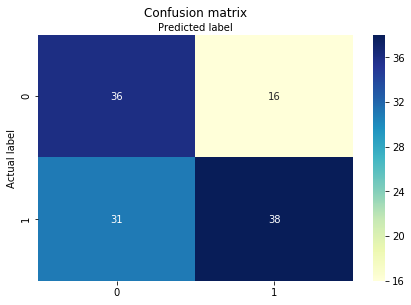

In [61]:
# classification_knn class gets the accuarcy for the model and shows heatmap for confusion matrix
obj.classification_knn()

52.892561983471076 % accuracy


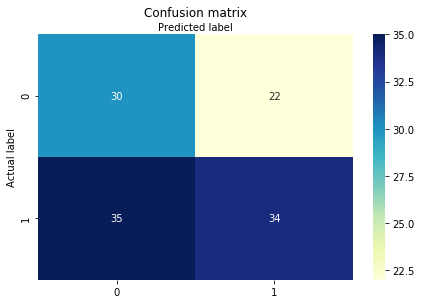

In [62]:
# classification_SVM class gets the accuarcy for the model and shows heatmap for confusion matrix
obj.classification_SVM()

57.02479338842975 % accuracy


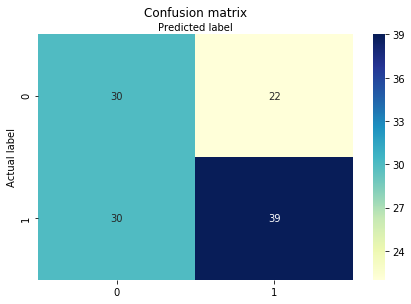

In [63]:
# classification_NB class gets the accuarcy for the model and shows heatmap for confusion matrix
obj.classification_NB()

C:\Users\UTSAV\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


48.760330578512395 % accuracy


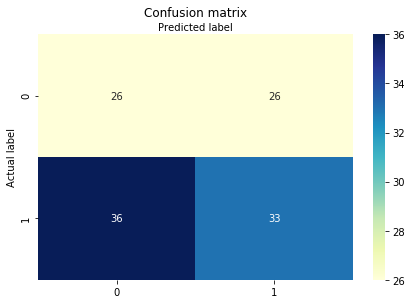

In [64]:
# classification_LR class gets the accuarcy for the model and shows heatmap for confusion matrix
obj.classification_LR()

In [65]:
# Here path of testing data is supplied
obj.validate_animal("D:/cerebroz_assignment/test/*")

In [66]:
# Prediction of data is done for KNN algorithm.
obj.knn_predic()

Predicted values =  [0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1.
 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1.
 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1.
 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1.
 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1.
 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1.
 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0.
 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0.
 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0.
 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0.
 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1.]


In [67]:
# Prediction of data is done for SVM algorithm.
obj.SVM_predic()

Predicted values =  [0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1.
 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0.
 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1.
 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0.
 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [68]:
# Prediction of data is done for NB(Naive Bayes) algorithm.
obj.NB_predic()

Predicted values =  [0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1.
 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0.
 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1.
 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1.
 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0.
 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1.
 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1.
 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1.
 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0.
 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1.]


In [69]:
# Prediction of data is done for LR algorithm.
obj.LR_predic()

C:\Users\UTSAV\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Predicted values =  [0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1.
 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0.
 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1.
 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1.
 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0.
 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1.
 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
